In [1]:
# Modules Needed for report

import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

# CDC Data

# Create a Data Frame to get number of cases and number of deaths

In [2]:
# URL for api to get Covid Information this will search for just california data between Feb 1 and july 31st
#Q2 data has missing chunks so we are using May -July
url = "https://data.cdc.gov/resource/9mfq-cb36.json?$where=submission_date between '2020-02-01' and '2020-07-31'&state=CA"

# Grabbing the data from the api and converting it to json

californiacoviddata= requests.get(url).json()

# Creating lists for Covid Data frame 

Date = []
NewCases = []
NewDeaths = []

# Adding each item from the json into our lists

for item in californiacoviddata:
    Date.append(item["submission_date"])
    NewCases.append(float(item["new_case"]))
    NewDeaths.append(float(item["new_death"]))
    
    
# Making a Data Frame for Covid Deaths

coviddata=pd.DataFrame({
    "Date":Date,
    "Cases":NewCases,
    "Deaths":NewDeaths
})
coviddata

,Date,Cases,Deaths
0,2020-02-01T00:00:00.000,0.0,0.0
1,2020-02-02T00:00:00.000,0.0,0.0
2,2020-02-03T00:00:00.000,3.0,0.0
3,2020-02-04T00:00:00.000,0.0,0.0
4,2020-02-05T00:00:00.000,0.0,0.0
...,...,...,...
177,2020-07-27T00:00:00.000,6891.0,29.0
178,2020-07-28T00:00:00.000,6000.0,73.0
179,2020-07-29T00:00:00.000,8755.0,197.0
180,2020-07-30T00:00:00.000,10197.0,194.0


# Add the Month Name to the Data Frame

In [3]:
# Creating a list named MonthName to store the name of month for each row in our data frame

MonthNum = []


# Example:  If the Date Field in our Data Frame Starts with 2020-05 Add May to MonthName list, if it starts with 2020-06
# add June if it starts with 2020-07 add July

for item in coviddata["Date"]:
        if "2020-02" in item:
            MonthNum.append(2)
            
        if "2020-03" in item:
            MonthNum.append(3)
            
        if "2020-04" in item:
            MonthNum.append(4)
            
        if "2020-05" in item:
            MonthNum.append(5)
            
        if "2020-06" in item:
            MonthNum.append(6)
            
        if "2020-07" in item:
            MonthNum.append(7)

# Create a column named Month to our covid dataframe

coviddata["Month"] = MonthNum

coviddata

,Date,Cases,Deaths,Month
0,2020-02-01T00:00:00.000,0.0,0.0,2
1,2020-02-02T00:00:00.000,0.0,0.0,2
2,2020-02-03T00:00:00.000,3.0,0.0,2
3,2020-02-04T00:00:00.000,0.0,0.0,2
4,2020-02-05T00:00:00.000,0.0,0.0,2
...,...,...,...,...
177,2020-07-27T00:00:00.000,6891.0,29.0,7
178,2020-07-28T00:00:00.000,6000.0,73.0,7
179,2020-07-29T00:00:00.000,8755.0,197.0,7
180,2020-07-30T00:00:00.000,10197.0,194.0,7


# Create a Data Frame to Summarize the CDC Data By Month

In [4]:
# Create a Summary DataFrame by grouping the data by the month get the total number of cases and deaths, and
# the average number of cases and deaths

coviddatabymonth=coviddata.groupby(["Month"])

totalnumberofcases = coviddatabymonth["Cases"].sum()
avgnumberofcases = coviddatabymonth["Cases"].mean()

totalnumberofdeaths = coviddatabymonth["Deaths"].sum()
avgnumberofdeaths = coviddatabymonth["Deaths"].mean()

# create data frame to display the Data

summarybymonthdf = pd.DataFrame ({
    "Number of CA Covid Cases": totalnumberofcases,
    "Number of CA Covid Deaths": totalnumberofdeaths
    
})

# Sort by Month Value
summarybymonthdf.sort_values(by=['Month'], inplace=True, ascending=True)

# Rename Month Number to Name of Month
summarybymonthdf.rename(index = {2:'Feburary', 3:'March', 4:'April', 5: 'May', 6: 'June', 7: 'July'}, inplace = True) 

# Display New Data Frame
summarybymonthdf

,Number of CA Covid Cases,Number of CA Covid Deaths
Month,,
Feburary,9.0,0.0
March,8119.0,172.0
April,40786.0,1810.0
May,61666.0,2231.0
June,112334.0,1767.0
July,270671.0,3025.0


In [5]:
# Create a seperate dataframe just for Deaths by removing the case column
coviddeaths_df=summarybymonthdf.drop(["Number of CA Covid Cases"], axis=1)

coviddeaths_df

,Number of CA Covid Deaths
Month,
Feburary,0.0
March,172.0
April,1810.0
May,2231.0
June,1767.0
July,3025.0


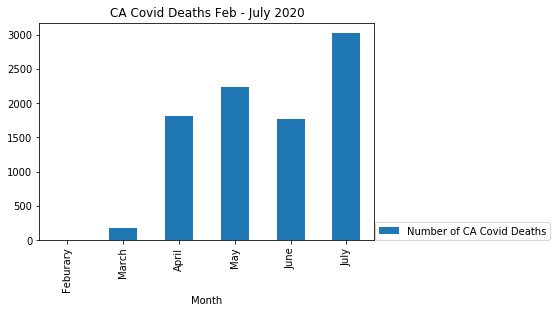

In [6]:
covidgraph = coviddeaths_df.plot(kind = "bar",
                                        
                                        title = "CA Covid Deaths Feb - July 2020"
 
                                    )

#adjust legend location so it is not on the graph.

covidgraph.legend(loc = (1.001, 0))
plt.show()

In [7]:
def creategraph(df, xaxis, yaxis, title):
    
    from scipy.stats import linregress

    (slope, intercept, rvalue, pvalue, stderr) = linregress(
        df[xaxis], df[yaxis])
    regress_values = df[xaxis] * slope + intercept    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    figure = plt.figure(figsize = (15, 4))
    plt.scatter(df[xaxis],df[yaxis])
    plt.plot(df[xaxis],regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

The r-squared is: 0.4385932120166525


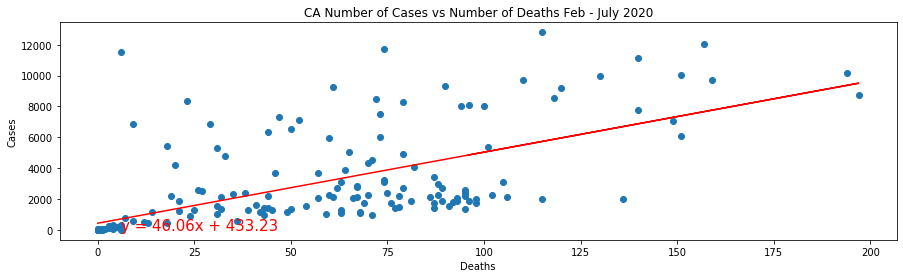

In [8]:
creategraph(df = coviddata, yaxis = "Cases", xaxis = "Deaths", 
            title = "CA Number of Cases vs Number of Deaths Feb - July 2020")

In [9]:
# Load the NY times data for SF specific information into a data frame using the read_csv command

sfcovidfile = pd.read_csv("NYT_us-counties.csv")


# grab the total number cases for SF County
#feb 1 - july 31
# group by San Francisco county
#get value count of deaths per month

sfcounty = sfcovidfile.loc[(sfcovidfile["county"] == "San Francisco")]
sfcounty

,date,county,state,fips,cases,deaths
49,2020-02-02,San Francisco,California,6075.0,2,0
57,2020-02-03,San Francisco,California,6075.0,2,0
65,2020-02-04,San Francisco,California,6075.0,2,0
73,2020-02-05,San Francisco,California,6075.0,2,0
82,2020-02-06,San Francisco,California,6075.0,2,0
...,...,...,...,...,...,...
434515,2020-08-15,San Francisco,California,6075.0,8160,69
437741,2020-08-16,San Francisco,California,6075.0,8295,69
440967,2020-08-17,San Francisco,California,6075.0,8349,70
444193,2020-08-18,San Francisco,California,6075.0,8430,70


In [10]:
#filtering on the date Feb - july

sfcounty = sfcounty[(sfcounty['date'] > '2020-02-01') & (sfcounty['date'] <= '2020-07-31')]
sfcounty

,date,county,state,fips,cases,deaths
49,2020-02-02,San Francisco,California,6075.0,2,0
57,2020-02-03,San Francisco,California,6075.0,2,0
65,2020-02-04,San Francisco,California,6075.0,2,0
73,2020-02-05,San Francisco,California,6075.0,2,0
82,2020-02-06,San Francisco,California,6075.0,2,0
...,...,...,...,...,...,...
373350,2020-07-27,San Francisco,California,6075.0,6025,56
376564,2020-07-28,San Francisco,California,6075.0,6068,56
379781,2020-07-29,San Francisco,California,6075.0,6200,57
382998,2020-07-30,San Francisco,California,6075.0,6426,58


In [11]:
# Create a seperate dataframe just for Deaths by removing the case column
sfdeaths = sfcounty.drop (["county", "state", "fips", "cases"], axis=1)



#changing the index to be the date column so it graphs accurately
sfdeaths.index = sfdeaths["date"]

# dataframe is displayed sfdeaths date column is displayed twice, will drop a column.

sfdeaths = sfdeaths.drop(["date"], axis=1)
sfdeaths




,deaths
date,
2020-02-02,0
2020-02-03,0
2020-02-04,0
2020-02-05,0
2020-02-06,0
...,...
2020-07-27,56
2020-07-28,56
2020-07-29,57


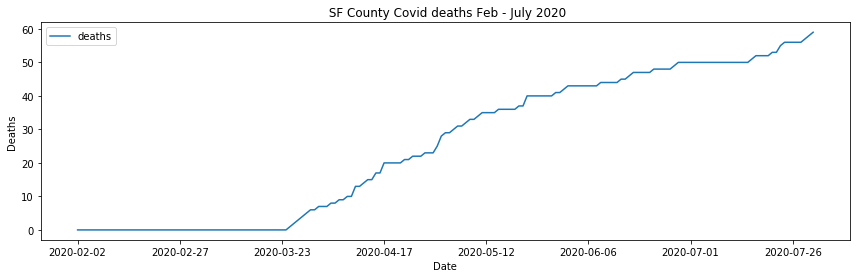

In [12]:

deathsgraph = sfdeaths.plot(
                                        figsize = (14.5, 4),
                                
                                        title = " SF County Covid deaths Feb - July 2020"
                                        
 
                                    )

#adjust legend location so it is not on the graph.
deathsgraph.set_xlabel("Date")
deathsgraph.set_ylabel("Deaths")
plt.show()

# Air BNB Data

# Create a Data Frame to summarize the number of listings for SF

In [13]:
# Load the Air BNB data into a data frame using the read_csv command
#using http://insideairbnb.com/get-the-data.html 
#using listing csv files for Feb- july for 2017-2020


febfile = pd.read_csv("feb_listings.csv")
marchfile = pd.read_csv("march_listings.csv")
aprilfile = pd.read_csv("april_listings.csv")
mayfile = pd.read_csv("may_listings.csv")
junefile = pd.read_csv("june_listings.csv")
julyfile = pd.read_csv("july_listings.csv")

feb2019 = pd.read_csv("feb_2019.csv")
march2019 = pd.read_csv("march_2019.csv")
april2019 = pd.read_csv("april_2019.csv")
may2019 = pd.read_csv("may_2019.csv")
june2019 = pd.read_csv("june_2019.csv")
july2019 = pd.read_csv("july_2019.csv")


feb2018 = pd.read_csv("feb_2018.csv")
march2018 = pd.read_csv("march_2018.csv")
april2018 = pd.read_csv("april_2018.csv")
may2018 = pd.read_csv("may_2018.csv")
july2018 = pd.read_csv("july_2018.csv")


feb2017 = pd.read_csv("feb_2017.csv")
march2017 = pd.read_csv("march_2017.csv")
april2017 = pd.read_csv("april_2017.csv")
may2017 = pd.read_csv("may_2017.csv")
june2017 = pd.read_csv("june_2017.csv")
july2017 = pd.read_csv("july_2017.csv")


# grab the total listings for each month

febtotal = febfile["neighbourhood"].count()
marchtotal = marchfile["neighbourhood"].count()
apriltotal = aprilfile["neighbourhood"].count()
maytotal = mayfile["neighbourhood"].count()
junetotal = junefile["neighbourhood"].count()
julytotal = julyfile["neighbourhood"].count()


feb2019total = feb2019["neighbourhood"].count()
march2019total = march2019["neighbourhood"].count()
april2019total = april2019["neighbourhood"].count()
may2019total = may2019["neighbourhood"].count()
june2019total = june2019["neighbourhood"].count()
july2019total = july2019["neighbourhood"].count()


feb2018total = feb2018["neighbourhood"].count()
march2018total = march2018["neighbourhood"].count()
april2018total = april2018["neighbourhood"].count()
may2018total = may2018["neighbourhood"].count()
july2018total = july2018["neighbourhood"].count()

feb2017total = feb2017["neighbourhood"].count()
march2017total = march2017["neighbourhood"].count()
april2017total = april2017["neighbourhood"].count()
may2017total = may2017["neighbourhood"].count()
june2017total = june2017["neighbourhood"].count()
july2017total = july2017["neighbourhood"].count()


# Create a summary Data Frame

airbnbtotals = pd.DataFrame ({
    "Total Listings": [febtotal, marchtotal,apriltotal, maytotal, junetotal, julytotal, 
                       feb2019total, march2019total, april2019total, may2019total, 
                        june2019total, july2019total, feb2018total, march2018total, 
                       april2018total, may2018total, july2018total, feb2017total, march2017total,
                       april2017total, may2017total, june2017total, july2017total
                      
                      ],
    
    "Month":[2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 7, 2, 3, 4, 5, 7, 
            2, 3, 4, 5, 6, 7],
    
    "Year":[2020,2020,2020,2020,2020,2020, 2019,2019,2019, 2019,2019,2019, 2018,2018,
            2018, 2018,2018, 2017, 2017, 2017, 2017, 2017, 2017,]
})



# Display DataFrame

airbnbtotals

,Total Listings,Month,Year
0,8587,2,2020
1,8572,3,2020
2,8138,4,2020
3,8078,5,2020
4,7814,6,2020
5,7526,7,2020
6,7198,2,2019
7,7151,3,2019
8,7277,4,2019
9,7353,5,2019


In [14]:
# Group Data By Month and Year

airbnbgrouped = airbnbtotals.groupby(["Year", "Month"])

# Display Total listing for each month and year by just calling the first command

totallistingsbyyearanddmonth = airbnbgrouped["Total Listings"].first()

# create a data frame so we can graph it in this format

airbnbyearmonthdf = pd.DataFrame({
    "Total Listings":totallistingsbyyearanddmonth
})

# Use unstack to pivot the data by year
airbnbyearmonthdf=airbnbyearmonthdf.unstack(level=1)

# Rename Month Number to Name of Month
airbnbyearmonthdf.rename(columns = {
                                2:"Feburary",
                                3:"March",
                                4:"April",
                                5:"May",
                                6:"June",
                                7:"July"
                                  }, inplace = True)

airbnbyearmonthdf

Total Listings                                        
Month       Feburary   March   April     May    June    July
Year                                                        
2017          8777.0  8720.0  8706.0  8770.0  8799.0  8855.0
2018          4727.0  4804.0  4844.0  4774.0     NaN  4693.0
2019          7198.0  7151.0  7277.0  7353.0  7575.0  7738.0
2020          8587.0  8572.0  8138.0  8078.0  7814.0  7526.0

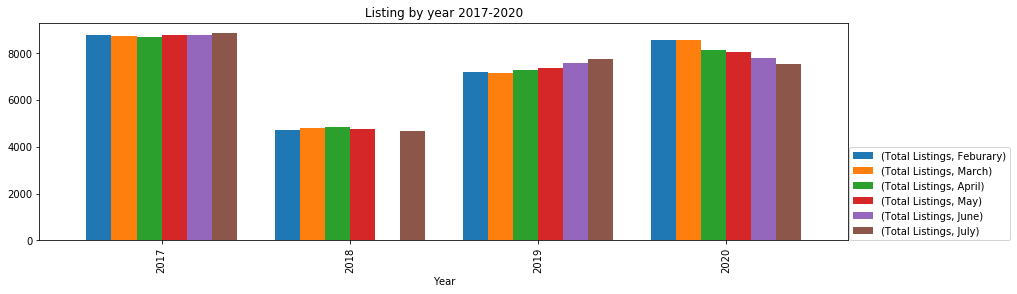

In [15]:
#  data so each bar is a month grouped by year

listings_graph = airbnbyearmonthdf.plot(kind = "bar",
                                        figsize = (14.5, 4),
                                        width = .8,
                                        title = "Listing by year 2017-2020"
                                        
 
                                    )

#adjust legend location so it is not on the graph.
listings_graph.legend(loc = (1.001, 0))
plt.show()

# Create a Data Frame to summarize the number of listings by neighborhood

In [16]:
# Group each file by neighbourhood

febneighborhoodgroup = febfile.groupby("neighbourhood")
marchneighborhoodgroup = marchfile.groupby("neighbourhood")
aprilneighborhoodgroup = aprilfile.groupby("neighbourhood")
mayneighborhoodgroup = mayfile.groupby("neighbourhood")
juneneighborhoodgroup = junefile.groupby("neighbourhood")
julyneighborhoodgroup = julyfile.groupby("neighbourhood")



feb2019neighborhoodgroup = feb2019.groupby("neighbourhood")
march2019neighborhoodgroup = march2019.groupby("neighbourhood")
april2019neighborhoodgroup = april2019.groupby("neighbourhood")
may2019neighborhoodgroup = may2019.groupby("neighbourhood")
june2019neighborhoodgroup = june2019.groupby("neighbourhood")
july2019neighborhoodgroup = july2019.groupby("neighbourhood")


feb2018neighborhoodgroup = feb2018.groupby("neighbourhood")
march2018neighborhoodgroup = march2018.groupby("neighbourhood")
april2018neighborhoodgroup = april2018.groupby("neighbourhood")
may2018neighborhoodgroup = may2018.groupby("neighbourhood")
july2018neighborhoodgroup = july2018.groupby("neighbourhood")

feb2017neighborhoodgroup = feb2017.groupby("neighbourhood")
march2017neighborhoodgroup = march2017.groupby("neighbourhood")
april2017neighborhoodgroup = april2017.groupby("neighbourhood")
may2017neighborhoodgroup = may2017.groupby("neighbourhood")
june2017neighborhoodgroup = june2017.groupby("neighbourhood")
july2017neighborhoodgroup  = july2017.groupby("neighbourhood")


# Get number of listings per neighborhood

febneighborhoodtotal = febneighborhoodgroup["neighbourhood"].count()
marchneighborhoodtotal = marchneighborhoodgroup["neighbourhood"].count()
aprilneighborhoodtotal = aprilneighborhoodgroup["neighbourhood"].count()
mayneighborhoodtotal = mayneighborhoodgroup["neighbourhood"].count()
juneneighborhoodtotal = juneneighborhoodgroup["neighbourhood"].count()
julyneighborhoodtotal = julyneighborhoodgroup["neighbourhood"].count()



feb2019neighborhoodtotal = feb2019neighborhoodgroup["neighbourhood"].count()
march2019neighborhoodtotal = march2019neighborhoodgroup["neighbourhood"].count()
april2019neighborhoodtotal = april2019neighborhoodgroup["neighbourhood"].count()
may2019neighborhoodtotal = may2019neighborhoodgroup["neighbourhood"].count()
june2019neighborhoodtotal = june2019neighborhoodgroup["neighbourhood"].count()
july2019neighborhoodtotal = july2019neighborhoodgroup["neighbourhood"].count()


feb2018neighborhoodtotal = feb2018neighborhoodgroup["neighbourhood"].count()
march2018neighborhoodtotal = march2018neighborhoodgroup["neighbourhood"].count()
april2018neighborhoodtotal = april2018neighborhoodgroup["neighbourhood"].count()
may2018neighborhoodtotal = may2018neighborhoodgroup["neighbourhood"].count()
july2018neighborhoodtotal = july2018neighborhoodgroup["neighbourhood"].count()

feb2017neighborhoodtotal = feb2017neighborhoodgroup["neighbourhood"].count()
march2017neighborhoodtotal = march2017neighborhoodgroup["neighbourhood"].count()
april2017neighborhoodtotal = april2017neighborhoodgroup["neighbourhood"].count()
may2017neighborhoodtotal = may2017neighborhoodgroup["neighbourhood"].count()
june2017neighborhoodtotal = june2017neighborhoodgroup["neighbourhood"].count()
july2017neighborhoodtotal  = july2017neighborhoodgroup["neighbourhood"].count()

# Create a summary data frame with this monthy data

airbnbsummarydf = pd.DataFrame({
    "Feb 2020 Listings": febneighborhoodtotal,
    "March 2020 Listings": marchneighborhoodtotal,
    "April 2020 Listings": aprilneighborhoodtotal,
    "May 2020 Listings": mayneighborhoodtotal,
    "June 2020 Listings": juneneighborhoodtotal,
    "July 2020 Listings": julyneighborhoodtotal,
    "Feb 2019 Listings": feb2019neighborhoodtotal,
    "March 2019 Listings": march2019neighborhoodtotal,
    "April 2019 Listings": april2019neighborhoodtotal,
    "May 2019 Listings": may2019neighborhoodtotal,
    "June 2019 Listings": june2019neighborhoodtotal,
    "July 2019 Listings": july2019neighborhoodtotal,
    "Feb 2018 Listings": feb2018neighborhoodtotal,
    "March 2018 Listings": march2018neighborhoodtotal,
    "April 2018 Listings": april2018neighborhoodtotal,
    "May 2018 Listings": may2018neighborhoodtotal,
    "July 2018 Listings": july2018neighborhoodtotal,
     "Feb 2017 Listings": feb2017neighborhoodtotal,
    "March 2017 Listings": march2017neighborhoodtotal,
    "April 2017 Listings": april2017neighborhoodtotal,
    "May 2017 Listings": may2017neighborhoodtotal,
    "June 2017 Listings": june2017neighborhoodtotal,
    "July 2017 Listings": july2017neighborhoodtotal
    
    
    
})

# Display DataFrame

airbnbsummarydf

,Feb 2020 Listings,March 2020 Listings,April 2020 Listings,May 2020 Listings,June 2020 Listings,July 2020 Listings,Feb 2019 Listings,March 2019 Listings,April 2019 Listings,May 2019 Listings,...,March 2018 Listings,April 2018 Listings,May 2018 Listings,July 2018 Listings,Feb 2017 Listings,March 2017 Listings,April 2017 Listings,May 2017 Listings,June 2017 Listings,July 2017 Listings
Bayview,221,227,215,207,197,186,155.0,157.0,162.0,169.0,...,123.0,120.0,114.0,100.0,121,115,118,126,136,137
Bernal Heights,404,402,388,377,365,352,384.0,374.0,385.0,388.0,...,299.0,310.0,320.0,320.0,450,452,451,459,461,473
Castro/Upper Market,459,447,435,431,419,399,416.0,405.0,410.0,422.0,...,301.0,293.0,293.0,292.0,504,495,480,477,479,485
Chinatown,157,156,155,155,152,147,117.0,118.0,118.0,115.0,...,51.0,54.0,57.0,62.0,126,158,152,161,144,146
Crocker Amazon,64,51,45,45,43,39,47.0,52.0,49.0,43.0,...,35.0,74.0,39.0,40.0,31,29,28,30,32,33
Diamond Heights,16,16,13,12,11,12,19.0,19.0,19.0,19.0,...,16.0,16.0,16.0,16.0,22,21,22,23,22,22
Downtown/Civic Center,767,785,728,734,724,721,518.0,538.0,585.0,616.0,...,288.0,310.0,311.0,318.0,510,514,564,564,565,547
Excelsior,181,180,179,183,178,161,151.0,162.0,164.0,163.0,...,108.0,104.0,111.0,104.0,148,152,153,152,154,161
Financial District,222,224,223,215,203,206,135.0,134.0,153.0,154.0,...,63.0,57.0,56.0,59.0,171,135,140,144,150,159
Glen Park,65,62,60,58,56,49,68.0,70.0,71.0,71.0,...,53.0,54.0,54.0,53.0,77,82,82,78,84,85


# Airbnb by room type and price

In [17]:
#group each month per year of airbnd data by room type to look at changes over the years

febroomgroup = febfile.groupby("room_type")
marchroomgroup = marchfile.groupby("room_type")
aprilroomgroup = aprilfile.groupby("room_type")
mayroomgroup = mayfile.groupby("room_type")
juneroomgroup = junefile.groupby("room_type")
julyroomgroup = julyfile.groupby("room_type")

feb2019roomgroup = feb2019.groupby("room_type")
march2019roomgroup = march2019.groupby("room_type")
april2019roomgroup = april2019.groupby("room_type")
may2019roomgroup = may2019.groupby("room_type")
june2019roomgroup = june2019.groupby("room_type")
july2019roomgroup = july2019.groupby("room_type")


feb2018roomgroup = feb2018.groupby("room_type")
march2018roomgroup = march2018.groupby("room_type")
april2018roomgroup = april2018.groupby("room_type")
may2018roomgroup = may2018.groupby("room_type")
july2018roomgroup = july2018.groupby("room_type")

feb2017roomgroup = feb2017.groupby("room_type")
march2017roomgroup = march2017.groupby("room_type")
april2017roomgroup = april2017.groupby("room_type")
may2017roomgroup = may2017.groupby("room_type")
june2017roomgroup = june2017.groupby("room_type")
july2017roomgroup  = july2017.groupby("room_type")

#average price for each group

febavg = febroomgroup["price"].mean()
marchavg = marchroomgroup["price"].mean()
aprilavg = aprilroomgroup["price"].mean()
mayavg = mayroomgroup["price"].mean()
juneavg = juneroomgroup["price"].mean()
julyavg = julyroomgroup["price"].mean()

feb2019avg = feb2019roomgroup["price"].mean()
march2019avg = march2019roomgroup["price"].mean()
april2019avg = april2019roomgroup["price"].mean()
may2019avg = may2019roomgroup["price"].mean()
june2019avg = june2019roomgroup["price"].mean()
july2019avg = july2019roomgroup["price"].mean()

feb2018avg = feb2018roomgroup["price"].mean()
march2018avg = march2018roomgroup["price"].mean()
april2018avg = april2018roomgroup["price"].mean()
may2018avg = may2018roomgroup["price"].mean()
july2018avg = july2018roomgroup["price"].mean()

feb2017avg = feb2017roomgroup["price"].mean()
march2017avg = march2017roomgroup["price"].mean()
april2017avg = april2017roomgroup["price"].mean()
may2017avg = may2017roomgroup["price"].mean()
june2017avg = june2017roomgroup["price"].mean()
july2017avg = july2017roomgroup["price"].mean()

#get min and max price, not sure if we are using this stat

maymin = mayroomgroup["price"].min()
maymax = mayroomgroup["price"].max()
junemin = juneroomgroup["price"].min()
junemax = juneroomgroup["price"].max()
julymin = julyroomgroup["price"].min()
julymax = julyroomgroup["price"].max()

#data frames for airbnb data grouped by room type for 2017-2020


roomdf = pd.DataFrame({
   
    "Feb 2020 Avg Price": febavg,
    "March 2020 Avg Price": marchavg,
    "April 2020 Avg Price": aprilavg,
    "May 2020 Avg Price": mayavg, 
    "June 2020 Avg Price": juneavg,   
    "July 2020 Avg Price": julyavg

})


#format average price and total revenue
#Tell jupyter how to format the column and replace the existing values

roomdf["Feb 2020 Avg Price"] = roomdf["Feb 2020 Avg Price"].map("${0:.2f}".format)
roomdf["March 2020 Avg Price"] = roomdf["March 2020 Avg Price"].map("${0:.2f}".format)
roomdf["April 2020 Avg Price"] = roomdf["April 2020 Avg Price"].map("${0:,.2f}".format)
roomdf["May 2020 Avg Price"] = roomdf["May 2020 Avg Price"].map("${0:,.2f}".format)
roomdf["June 2020 Avg Price"] = roomdf["June 2020 Avg Price"].map("${0:,.2f}".format)
roomdf["July 2020 Avg Price"] = roomdf["July 2020 Avg Price"].map("${0:,.2f}".format)
roomdf

,Feb 2020 Avg Price,March 2020 Avg Price,April 2020 Avg Price,May 2020 Avg Price,June 2020 Avg Price,July 2020 Avg Price
room_type,,,,,,
Entire home/apt,$271.86,$272.68,$265.73,$261.28,$264.23,$264.18
Hotel room,$269.79,$281.06,$280.01,$978.06,"$1,025.55","$1,024.62"
Private room,$163.28,$166.89,$166.26,$167.45,$169.09,$169.72
Shared room,$88.67,$87.14,$95.83,$90.64,$94.63,$105.84


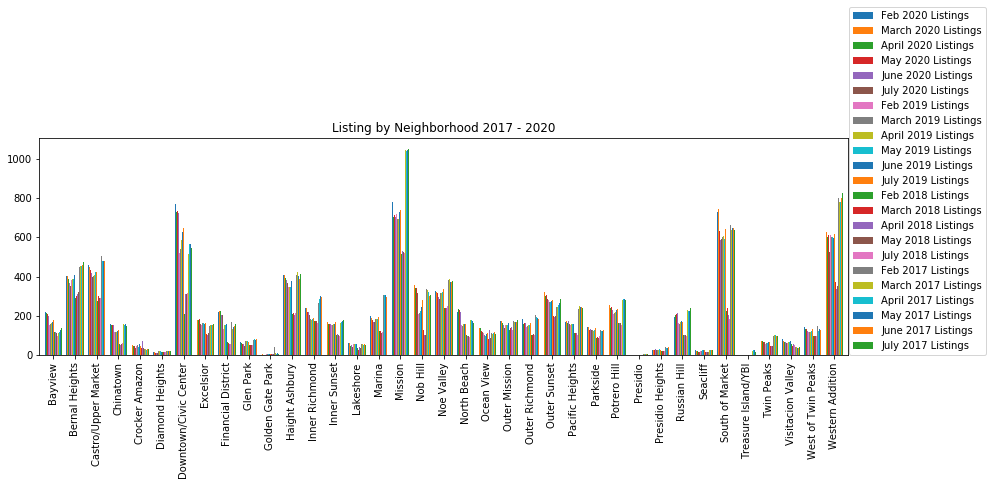

In [18]:

neighborhoodgraph = airbnbsummarydf.plot(kind = "bar",
                                        figsize = (14.5, 4),
                                        width = .8,
                                        title = "Listing by Neighborhood 2017 - 2020"
                                        
 
                                    ) 

#adjust legend location so it is not on the graph.
neighborhoodgraph.legend(loc = (1.001, 0))
plt.show()


Airbnd data about top 10 neighborhooods and number of listings

In [19]:
#find the top 10 neighborhoods with the most listings per year
#calculate avg price of listing per neighborhood.

#LONG way is use .drop command and drop the years from the data frame.
#neighborhood2020 = airbnbsummarydf.drop(["Feb 2019 Listings","March 2019 Listings", 
                                         #"April 2019 Listings","May 2019 Listings",
                                         #"June 2019 Listings", "July 2019 Listings"], axis=1)


#creating variables for number of listing per year

airbnb2020totals=febneighborhoodtotal+marchneighborhoodtotal+aprilneighborhoodtotal+mayneighborhoodtotal+juneneighborhoodtotal+julyneighborhoodtotal



airbnb2019totals=feb2019neighborhoodtotal+march2019neighborhoodtotal+april2019neighborhoodtotal+may2019neighborhoodtotal+june2019neighborhoodtotal+july2019neighborhoodtotal


airbnb2018totals=feb2018neighborhoodtotal+march2018neighborhoodtotal+april2018neighborhoodtotal+may2018neighborhoodtotal+july2018neighborhoodtotal

airbnb2017totals=feb2017neighborhoodtotal+march2017neighborhoodtotal+april2017neighborhoodtotal+may2017neighborhoodtotal+june2017neighborhoodtotal+july2017neighborhoodtotal

#create a data frame for total list for each year per neighbhorhood

airbnb2020listingsdf = pd.DataFrame({
    "2020 Listings":airbnb2020totals
    
})

airbnb2019listingsdf = pd.DataFrame({
    "2019 Listings":airbnb2019totals
    
})

airbnb2018listingsdf = pd.DataFrame({
    "2018 Listings":airbnb2018totals
    
})

airbnb2017listingsdf = pd.DataFrame({
    "2017 Listings":airbnb2017totals
    
})
airbnb2020top10 = airbnb2020listingsdf.sort_values(by = "2020 Listings", ascending = False).head(10)

airbnb2019top10 = airbnb2019listingsdf.sort_values(by = "2019 Listings", ascending = False).head(10)

airbnb2018top10 = airbnb2018listingsdf.sort_values(by = "2018 Listings", ascending = False).head(10)

airbnb2017top10 = airbnb2017listingsdf.sort_values(by = "2017 Listings", ascending = False).head(10)

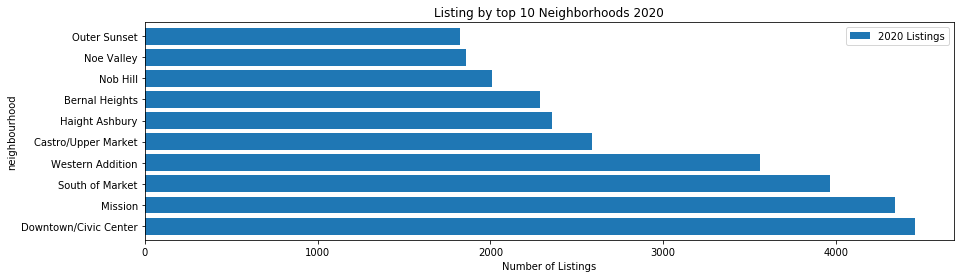

In [20]:
airbnb2020top10.plot(kind = "barh",
                     figsize = (14.5, 4),
                     width = .8,
                     title = "Listing by top 10 Neighborhoods 2020"
                                        
 
                                    ) 

plt.xlabel("Number of Listings")
plt.show()

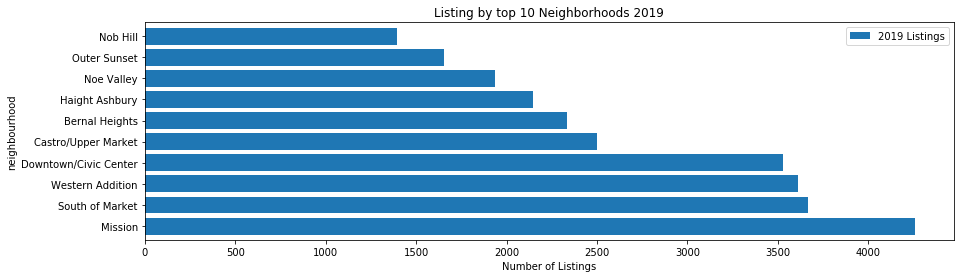

In [21]:
airbnb2019top10.plot(kind = "barh",
                     figsize = (14.5, 4),
                     width = .8,
                     title = "Listing by top 10 Neighborhoods 2019"
                                        
 
                                    ) 

plt.xlabel("Number of Listings")
plt.show()

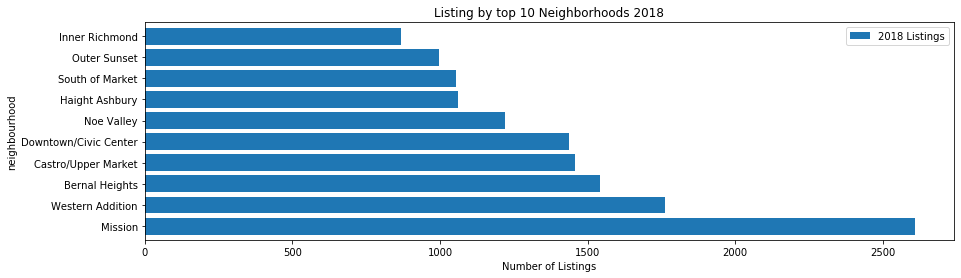

In [22]:
airbnb2018top10.plot(kind = "barh",
                     figsize = (14.5, 4),
                     width = .8,
                     title = "Listing by top 10 Neighborhoods 2018"
                                        
 
                                    ) 

plt.xlabel("Number of Listings")
plt.show()

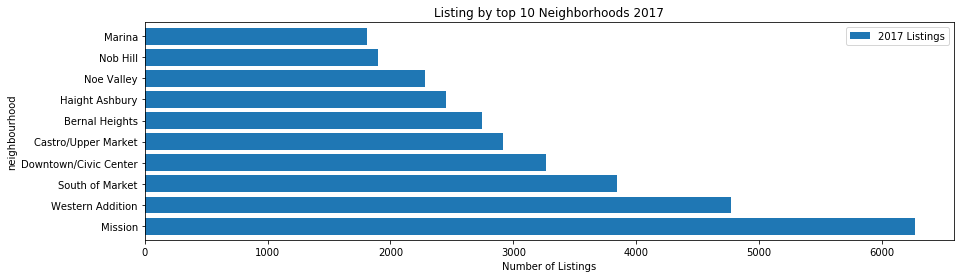

In [23]:
airbnb2017top10.plot(kind = "barh",
                       figsize = (14.5, 4),
                      width = .8,
                         title = "Listing by top 10 Neighborhoods 2017"
                        )
                                        
 

plt.xlabel("Number of Listings")
plt.show()

